## Imports and Data Handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import cv2
from PIL import Image

In [3]:
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from keras.layers import Activation, Dense

In [4]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

## Configuring and Converting Data

In [6]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Creating and Compiling Model

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/25


C:\Users\Soham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.2884 - loss: 3.1025 - val_accuracy: 0.8485 - val_loss: 0.5749
Epoch 2/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.7713 - loss: 0.7625 - val_accuracy: 0.9439 - val_loss: 0.2240
Epoch 3/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8533 - loss: 0.4825 - val_accuracy: 0.9656 - val_loss: 0.1295
Epoch 4/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8876 - loss: 0.3756 - val_accuracy: 0.9748 - val_loss: 0.1035
Epoch 5/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8987 - loss: 0.3440 - val_accuracy: 0.9773 - val_loss: 0.0895
Epoch 6/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9119 - loss: 0.3044 - val_accuracy: 0.9679 - val_loss: 0.1195
Epoch 7/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9163 - loss: 0.2824 - val_accuracy: 0.9705 - val_loss: 0.0944
Epoch 8/25
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9165 - loss: 0.2967 - val_accurac

## Training the Model

In [8]:
epochs=25
history1 = history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9490 - loss: 0.1874 - val_accuracy: 0.9916 - val_loss: 0.0376
Epoch 2/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.9609 - loss: 0.1392 - val_accuracy: 0.9850 - val_loss: 0.0498
Epoch 3/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9571 - loss: 0.1476 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 4/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.9540 - loss: 0.1655 - val_accuracy: 0.9909 - val_loss: 0.0321
Epoch 5/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9601 - loss: 0.1532 - val_accuracy: 0.9904 - val_loss: 0.0326
Epoch 6/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.9543 - loss: 0.1635 - val_accuracy: 0.9895 - val_loss: 0.0378
Epoch 7/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9550 - loss: 0.1672 - val_accuracy: 0.9864 - val_loss: 0.0452
Epoch 8/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.9458 - loss: 0.2069 - 

## Training phase performance visualization

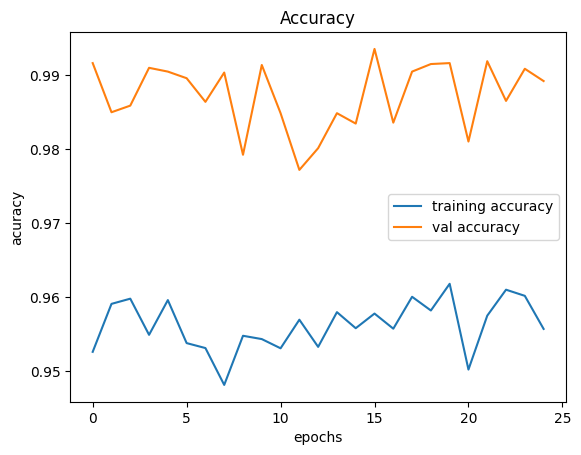

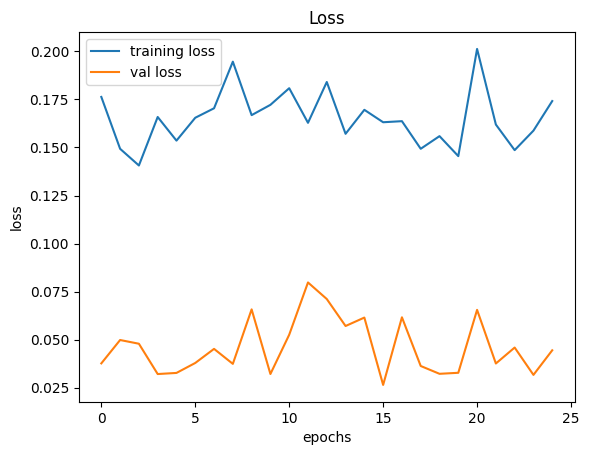

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


## Loading Test Dataset and Evaluating the Model

In [11]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

print("Accuracy ==> ",accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy ==>  0.9571654790182106


## Saving the Model

In [12]:
model.save('traffic_classifier.h5')